<a href="https://colab.research.google.com/github/fahriyegrl/article_reader_withNLP_tensor_flow/blob/main/Article_Reader_withNLP_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for reviewing an article quickler and easier with utilizing a NLP model by sentence classification. Using different model and different subset of dataset to get the best preforming model with hight accurancy.

The dataset is gotten from this paper: https://arxiv.org/abs/1710.06071 and stored in github: https://github.com/Franck-Dernoncourt/pubmed-rct

The paper- https://arxiv.org/abs/1612.05251 is utulized for some models here.

In [3]:
## Getting dataset and preprocess them to get them ready for models.
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 37.41 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [4]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [5]:
## using the 20K datesets with numbers replaced by"@"

data_directory = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [6]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [7]:
with open(data_directory + "train.txt") as f:
  print(f.readlines()[:20])

['###24293578\n', 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n', 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n', 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n', 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n', 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n', 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-s

In [8]:
def preprocess_data(data_directory):
  input_lines = open(data_directory).readlines()
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples





In [9]:
data_directory

'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [10]:
train_dir = data_directory + "train.txt"
val_dir = data_directory + "dev.txt"
test_dir = data_directory + "test.txt"

train_dir, val_dir, test_dir

('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [11]:
train_text_samples = preprocess_data(train_dir)
print(len(train_text_samples))

180040


In [12]:
train_text_samples[:2]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11}]

In [13]:
val_text_samples = preprocess_data(val_dir)
test_text_samples = preprocess_data(test_dir)

len(val_text_samples), len(test_text_samples)

(30212, 30135)

In [14]:
import pandas as pd
train_dataframe = pd.DataFrame(train_text_samples)
train_dataframe.head()

test_dataframe = pd.DataFrame(test_text_samples)
val_dataframe = pd.DataFrame(val_text_samples)

In [17]:
## changing the train-test-val data to numeric values

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
train_one_hot = one_hot_encoder.fit_transform(train_dataframe[["target"]])
val_one_hot = one_hot_encoder.transform(val_dataframe[["target"]])
test_one_hot = one_hot_encoder.transform(test_dataframe[["target"]])


train_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
## Label encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_dataframe["target"])
val_labels = label_encoder.transform(val_dataframe["target"])
test_labels = label_encoder.transform(test_dataframe["target"])

train_labels

array([3, 2, 2, ..., 4, 1, 1])

In [56]:
label_encoder.classes_

class_names = label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [19]:
# Model 1 is a simple model from sklearn-naive bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_1 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_1.fit(train_dataframe["text"], train_labels)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
## evaluation Model 1

model_1.score(val_dataframe["text"], val_labels)
#

0.7218323844829869

In [21]:
## Make prediction with Model 1

preds_model_1 = model_1.predict(val_dataframe["text"])
preds_model_1

array([4, 1, 3, ..., 4, 4, 1])

In [27]:
## Model 1 Results

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
model_1_acc = accuracy_score(val_labels, preds_model_1) * 100
model_1_precision, model_1_recall, model_1_f1, _ = precision_recall_fscore_support(val_labels, preds_model_1, average="weighted")

model_1_results = {
    "accuracy": model_1_acc,
    "precision": model_1_precision,
    "recall": model_1_recall,
    "f1": model_1_f1
}

model_1_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [28]:
## Getting insight from train data to set output
import numpy as np
average_lenght = np.mean([len(sentence.split()) for sentence in train_dataframe["text"]])
average_lenght

26.338269273494777

(array([1.1050e+03, 3.5170e+03, 7.7850e+03, 1.3079e+04, 1.6589e+04,
        1.8463e+04, 1.8770e+04, 1.7656e+04, 1.5580e+04, 1.3302e+04,
        1.1002e+04, 9.0040e+03, 7.0390e+03, 5.5540e+03, 4.2780e+03,
        3.3890e+03, 2.7020e+03, 2.1960e+03, 1.7050e+03, 9.5300e+02,
        1.1780e+03, 9.0000e+02, 7.5000e+02, 6.0900e+02, 4.9400e+02,
        4.0100e+02, 3.5000e+02, 2.5000e+02, 2.2900e+02, 2.1500e+02,
        1.6700e+02, 1.2600e+02, 1.0200e+02, 1.0100e+02, 6.4000e+01,
        6.1000e+01, 5.5000e+01, 4.5000e+01, 4.0000e+01, 2.5000e+01,
        2.5000e+01, 2.4000e+01, 2.2000e+01, 1.4000e+01, 1.6000e+01,
        1.0000e+01, 7.0000e+00, 1.6000e+01, 7.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 6.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 1.00

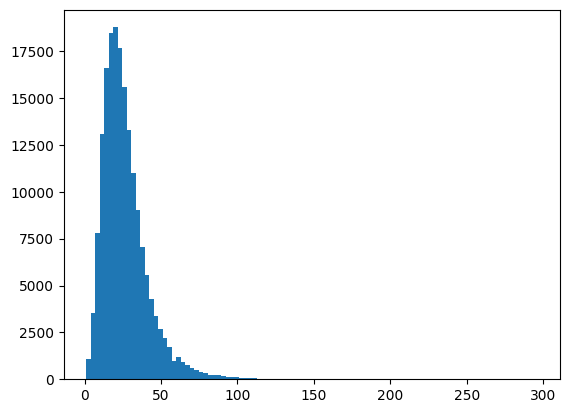

In [29]:
import matplotlib.pyplot as plt

plt.hist([len(sentence.split()) for sentence in train_dataframe["text"]], bins=100)


In [38]:
output_length = int(np.percentile([len(sentence.split()) for sentence in train_dataframe["text"]], 95))
output_length

55

In [33]:
## The vocab in the dataset is 68000 that comes from https://arxiv.org/pdf/1710.06071

tokens_size = 68000

In [40]:
### Text Vectorizer

from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens=tokens_size,
    output_sequence_length=output_length)

text_vectorizer.adapt(train_dataframe["text"])


In [42]:
import random

sample= random.choice(train_dataframe["text"])
print(sample)

print(text_vectorizer([sample]))



unprotected sex with an hiv discordant or status unknown partner was similar in each group ( @/@ -lsb- @ % -rsb- vs @/@ -lsb- @ % -rsb- , difference -@ % , one-sided @ % ci @ ) .
tf.Tensor(
[[6457  693    7   26  500 9436   16  272 1043 2256   10  150    5  122
    13   46   45   44   46   45   74 4698   50    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 55), dtype=int64)


In [44]:
get_size = len(text_vectorizer.get_vocabulary())
get_size

64841

In [46]:
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [49]:
### Text Embedding
from tensorflow.keras import layers

text_embedding = layers.Embedding(input_dim= len(text_vectorizer.get_vocabulary()),
                                  output_dim=128,

                                  name="text_embedding")

In [51]:
vectored = text_vectorizer([sample])
vectored

embedded = text_embedding(vectored)
embedded

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.03155095,  0.04509581, -0.00928963, ..., -0.04862754,
          0.04942631, -0.02151741],
        [-0.04421071,  0.02107516, -0.02110283, ...,  0.01015245,
          0.04532382, -0.0343874 ],
        [ 0.00708138,  0.02467649, -0.04947653, ...,  0.02429675,
          0.01051318,  0.03415093],
        ...,
        [-0.0361129 ,  0.00073508,  0.04877459, ..., -0.03728764,
          0.04332581,  0.01464847],
        [-0.0361129 ,  0.00073508,  0.04877459, ..., -0.03728764,
          0.04332581,  0.01464847],
        [-0.0361129 ,  0.00073508,  0.04877459, ..., -0.03728764,
          0.04332581,  0.01464847]]], dtype=float32)>

In [58]:
## Dataset Preparation

import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((train_dataframe["text"], train_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_dataframe["text"], val_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_dataframe["text"], test_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [59]:
## Dataset Batching

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [60]:
## Model 2 with Conv1D + text embedding

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = text_embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_conv1d")

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [61]:
model_2.summary()

Model: "model_2_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_embedding (Embedding)           │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_2.fit(train_dataset,
            epochs=3,
            steps_per_epoch=int(0.25 * len(train_dataset)),
            validation_data=val_dataset,
            validation_steps=int(0.25 * len(val_dataset)))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


5627/5627 ━━━━━━━━━━━━━━━━━━━━ 533s 94ms/step - accuracy: 0.7482 - loss: 0.6654 - val_accuracy: 0.8206 - val_loss: 0.4844
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 496s 88ms/step - accuracy: 0.8580 - loss: 0.3980 - val_accuracy: 0.8230 - val_loss: 0.5018
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 530s 94ms/step - accuracy: 0.9169 - loss: 0.2504 - val_accuracy: 0.8095 - val_loss: 0.6013
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 654s 116ms/step - accuracy: 0.9611 - loss: 0.1327 - val_accuracy: 0.7865 - val_loss: 0.8083
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9820 - loss: 0.0669

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5627/5627 ━━━━━━━━━━━━━━━━━━━━ 681s 121ms/step - accuracy: 0.9820 - loss: 0.0669 - val_accuracy: 0.7500 - val_loss: 0.3646


In [64]:
model_2.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7895 - loss: 0.8763


[0.9067605137825012, 0.7856811881065369]

In [65]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs

 10/945 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


array([[8.4720248e-01, 1.2004753e-03, 4.9315521e-04, 1.5087160e-01,
        2.3216079e-04],
       [7.9261601e-01, 1.6013572e-03, 5.7216891e-08, 2.0578255e-01,
        4.2904957e-10],
       [1.7136165e-01, 8.2199094e-06, 4.1032072e-07, 8.2862967e-01,
        1.9634394e-09],
       ...,
       [4.7596990e-07, 3.3715173e-06, 7.2739422e-02, 7.8807943e-06,
        9.2724884e-01],
       [4.0147968e-02, 2.5302586e-01, 1.3296296e-03, 4.5558470e-04,
        7.0504093e-01],
       [1.7897196e-09, 9.9999988e-01, 1.9798502e-08, 7.6330275e-10,
        6.3287573e-08]], dtype=float32)

In [66]:
model_2_pred = tf.argmax(model_2_pred_probs, axis=1)

In [67]:
model_2_acc = accuracy_score(val_labels, model_2_pred) * 100
model_2_precision, model_2_recall, model_2_f1, _ = precision_recall_fscore_support(val_labels, model_2_pred, average="weighted")

model_2_results = {
    "accuracy": model_2_acc,
    "precision": model_2_precision,
    "recall": model_2_recall,
    "f1": model_2_f1
}

model_2_results

{'accuracy': 78.5681186283596,
 'precision': 0.7857670863005443,
 'recall': 0.785681186283596,
 'f1': 0.784939050259031}

In [86]:
### Model 3 Feature Extraction

# utulizing the pretrained word embedding from universal-sentence-encoder(USE)

import tensorflow_hub as hub

tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [87]:

sample_sentences = random.sample(train_dataframe["text"].tolist(), k=1)
use_embedded = tf_hub_embedding_layer(sample_sentences)
use_embedded[0, :10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.06398077,  0.06663608,  0.06618215, -0.00862566, -0.06586786,
       -0.03932819,  0.00589034, -0.06365872,  0.04166731,  0.01006791],
      dtype=float32)>

In [92]:
inputs = layers.Input(shape=[], dtype=tf.string)
# Wrap the hub layer call within a Lambda layer to handle the KerasTensor
# and specify the output shape
embedding_layer = layers.Lambda(lambda x: tf_hub_embedding_layer(x), output_shape=(512,))(inputs)
x = layers.Dense(128, activation="relu")(embedding_layer)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_USE")

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [93]:
model_3.fit(train_dataset,
            epochs=3,
            steps_per_epoch=int(0.25 * len(train_dataset)),
            validation_data=val_dataset,
            validation_steps=int(0.25 * len(val_dataset)))


Epoch 1/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.6377 - loss: 0.9523 - val_accuracy: 0.7154 - val_loss: 0.7400
Epoch 2/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7193 - loss: 0.7317 - val_accuracy: 0.7350 - val_loss: 0.6949
Epoch 3/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.7320 - loss: 0.7060 - val_accuracy: 0.7530 - val_loss: 0.6504


In [94]:
model_3.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7454 - loss: 0.6687


[0.6720097064971924, 0.7453329563140869]

In [95]:
model_3_pred_probs = model_3.predict(val_dataset)
model_3_pred = tf.argmax(model_3_pred_probs, axis=1)
model_3_pred

945/945 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [96]:
model_3_acc = accuracy_score(val_labels, model_3_pred) * 100
model_3_precision, model_3_recall, model_3_f1, _ = precision_recall_fscore_support(val_labels, model_3_pred, average="weighted")

model_3_results = {
    "accuracy": model_3_acc,
    "precision": model_3_precision,
    "recall": model_3_recall,
    "f1": model_3_f1
}

model_3_results

{'accuracy': 74.53329802727393,
 'precision': 0.7443220758980639,
 'recall': 0.7453329802727393,
 'f1': 0.7410294240447834}

In [97]:
### Model 4 with character embedding + Conv1D

" ".join(list(train_dataframe["text"][0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [98]:
def split_characters(text):
  return " ".join(list(text))

In [103]:
train_chars = [split_characters(sentence) for sentence in train_dataframe["text"]]
val_chars = [split_characters(sentence) for sentence in val_dataframe["text"]]
test_chars = [split_characters(sentence) for sentence in test_dataframe["text"]]

In [104]:
train_chars[:2]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .']

(array([9.2691e+04, 7.6343e+04, 9.6890e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <BarContainer object of 10 artists>)

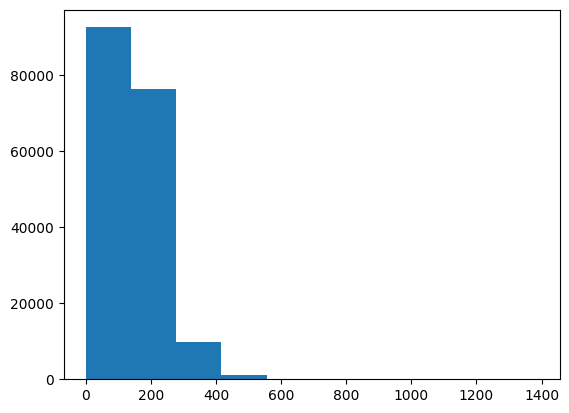

In [112]:
character_lenght = [len(sentence) for sentence in train_dataframe["text"]]
average_char = np.mean(character_lenght)
average_char

plt.hist(character_lenght)

In [119]:
output_char_lenght = int(np.percentile(character_lenght, 95))
output_char_lenght

290

In [115]:
## how many total character

import string

total_char = string.ascii_letters + string.digits + string.punctuation
total_char

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
char_tokens = len(total_char) + 2
char_tokens

96

In [132]:
## char vectorization

char_vectorizer = TextVectorization(
    max_tokens=output_char_lenght,
    output_sequence_length=output_char_lenght)

char_vectorizer.adapt(train_chars)

In [133]:
char_vectorizer.get_vocabulary()

['',
 '[UNK]',
 'e',
 't',
 'i',
 'a',
 'n',
 'o',
 'r',
 's',
 'd',
 'c',
 'l',
 'h',
 'p',
 'm',
 'u',
 'f',
 'g',
 'y',
 'w',
 'v',
 'b',
 'k',
 'x',
 'z',
 'q',
 'j']

In [134]:
random_char = random.choice(train_chars)
char_vectorizer(random_char), random_char

(<tf.Tensor: shape=(290,), dtype=int64, numpy=
 array([ 7,  6, 12, 19, 14,  5,  8,  3,  4, 11,  4, 14,  5,  6,  3,  9, 13,
         5, 10,  5,  6,  2,  9,  3,  4, 15,  5,  3,  2, 10, 18, 12,  7, 15,
         2,  8, 16, 12,  5,  8, 17,  4, 12,  3,  8,  5,  3,  4,  7,  6,  8,
         5,  3,  2, 15, 12, 15,  4,  6, 15,  4,  6, 11, 12, 16, 10,  4,  6,
        18, 17,  7, 16,  8, 20, 13,  7,  5, 12,  9,  7, 13,  5, 10, 14,  8,
         7,  3,  2,  4,  6, 16,  8,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  

In [193]:
## character embedding

char_embedding = layers.Embedding(input_dim=output_char_lenght,
                                  output_dim=25,  ## it comes from the paper: https://arxiv.org/pdf/1612.05251
                                  name="char_embedding")

In [194]:
vectored = char_vectorizer(random_char)
embedded = char_embedding(vectored)
embedded

<tf.Tensor: shape=(290, 25), dtype=float32, numpy=
array([[ 0.03954795,  0.01371381,  0.01736755, ..., -0.03513299,
        -0.03519765, -0.04572881],
       [ 0.00457569,  0.04908701, -0.04473161, ...,  0.03954239,
         0.02719286,  0.02655199],
       [-0.00860735, -0.00034577, -0.02488059, ..., -0.03198925,
        -0.04076724, -0.0079824 ],
       ...,
       [ 0.01236988,  0.01663623,  0.01366705, ..., -0.0239527 ,
        -0.01585543, -0.01465402],
       [ 0.01236988,  0.01663623,  0.01366705, ..., -0.0239527 ,
        -0.01585543, -0.01465402],
       [ 0.01236988,  0.01663623,  0.01366705, ..., -0.0239527 ,
        -0.01585543, -0.01465402]], dtype=float32)>

In [139]:
### building the Model 4

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_char_embedding_conv1D')

model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [195]:
model_4.summary()

Model: "model_4_char_embedding_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 290)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embedding (Embedding)           │ (None, 290, 25)             │           7,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,919 (183.28 KB)

 Trainable params: 15,639 (61.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,280 (122.19 KB)

In [142]:
train_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [143]:
## Char Datasets

train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)



train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [144]:
model_4.fit(train_char_dataset,
            epochs=3,
            steps_per_epoch=int(0.25*len(train_char_dataset)),
            validation_data=val_char_dataset,
            validation_steps=int(0.25*len(val_char_dataset)))

Epoch 1/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.4858 - loss: 1.2569 - val_accuracy: 0.6531 - val_loss: 0.8947
Epoch 2/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.6492 - loss: 0.8936 - val_accuracy: 0.6752 - val_loss: 0.8360
Epoch 3/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.6777 - loss: 0.8331 - val_accuracy: 0.6952 - val_loss: 0.7858


In [147]:
model_4_pred_probs = model_4.predict(val_char_dataset)
model_4_pred_probs = np.array(model_4_pred_probs)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

945/945 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [148]:
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [149]:
model_4_acc = accuracy_score(val_labels, model_4_preds) * 100
model_4_precision, model_4_recall, model_4_f1, _ = precision_recall_fscore_support(val_labels, model_4_preds, average="weighted")

model_4_results = {
    "accuracy": model_4_acc,
    "precision": model_4_precision,
    "recall": model_4_recall,
    "f1": model_4_f1
}

model_4_results

{'accuracy': 69.20428968621741,
 'precision': 0.70212697946544,
 'recall': 0.692042896862174,
 'f1': 0.6870662353272119}

In [197]:
### Model 5 with char embeddings + pretrained token embeddings

#  token inputs / model same sa Model 3 pretrained
token_inputs = layers.Input(shape=[], dtype=tf.string)
#token_embed = tf_hub_embedding_layer(token_inputs)
token_embed = layers.Lambda(lambda x: tf_hub_embedding_layer(x), output_shape=(512,))(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embed)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_embedding_layer = layers.Embedding(input_dim=output_char_lenght,
                                    output_dim=25,
                                    )

# char input/ model
char_inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vector = char_vectorizer(char_inputs)
char_embedded = char_embedding_layer(char_vector)
char_bidierect = layers.Bidirectional(layers.LSTM(24))(char_embedded) ## get 24 from the paper
char_model = tf.keras.Model(char_inputs, char_bidierect)


 # merge token and char
token_and_char_embedding = layers.Concatenate()([token_model.output, char_model.output])

# finalizing the model by adding dropout (dropout is suggested in the paper:https://arxiv.org/pdf/1612.05251 )

combined_dropout = layers.Dropout(0.5)(token_and_char_embedding)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
last_dropout = layers.Dropout(0.5)(combined_dense)
last_dense = layers.Dense(5, activation="softmax")(last_dropout)

model_5 = tf.keras.Model([token_model.input, char_model.input], last_dense, name="model_5_token_char_combined")

model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


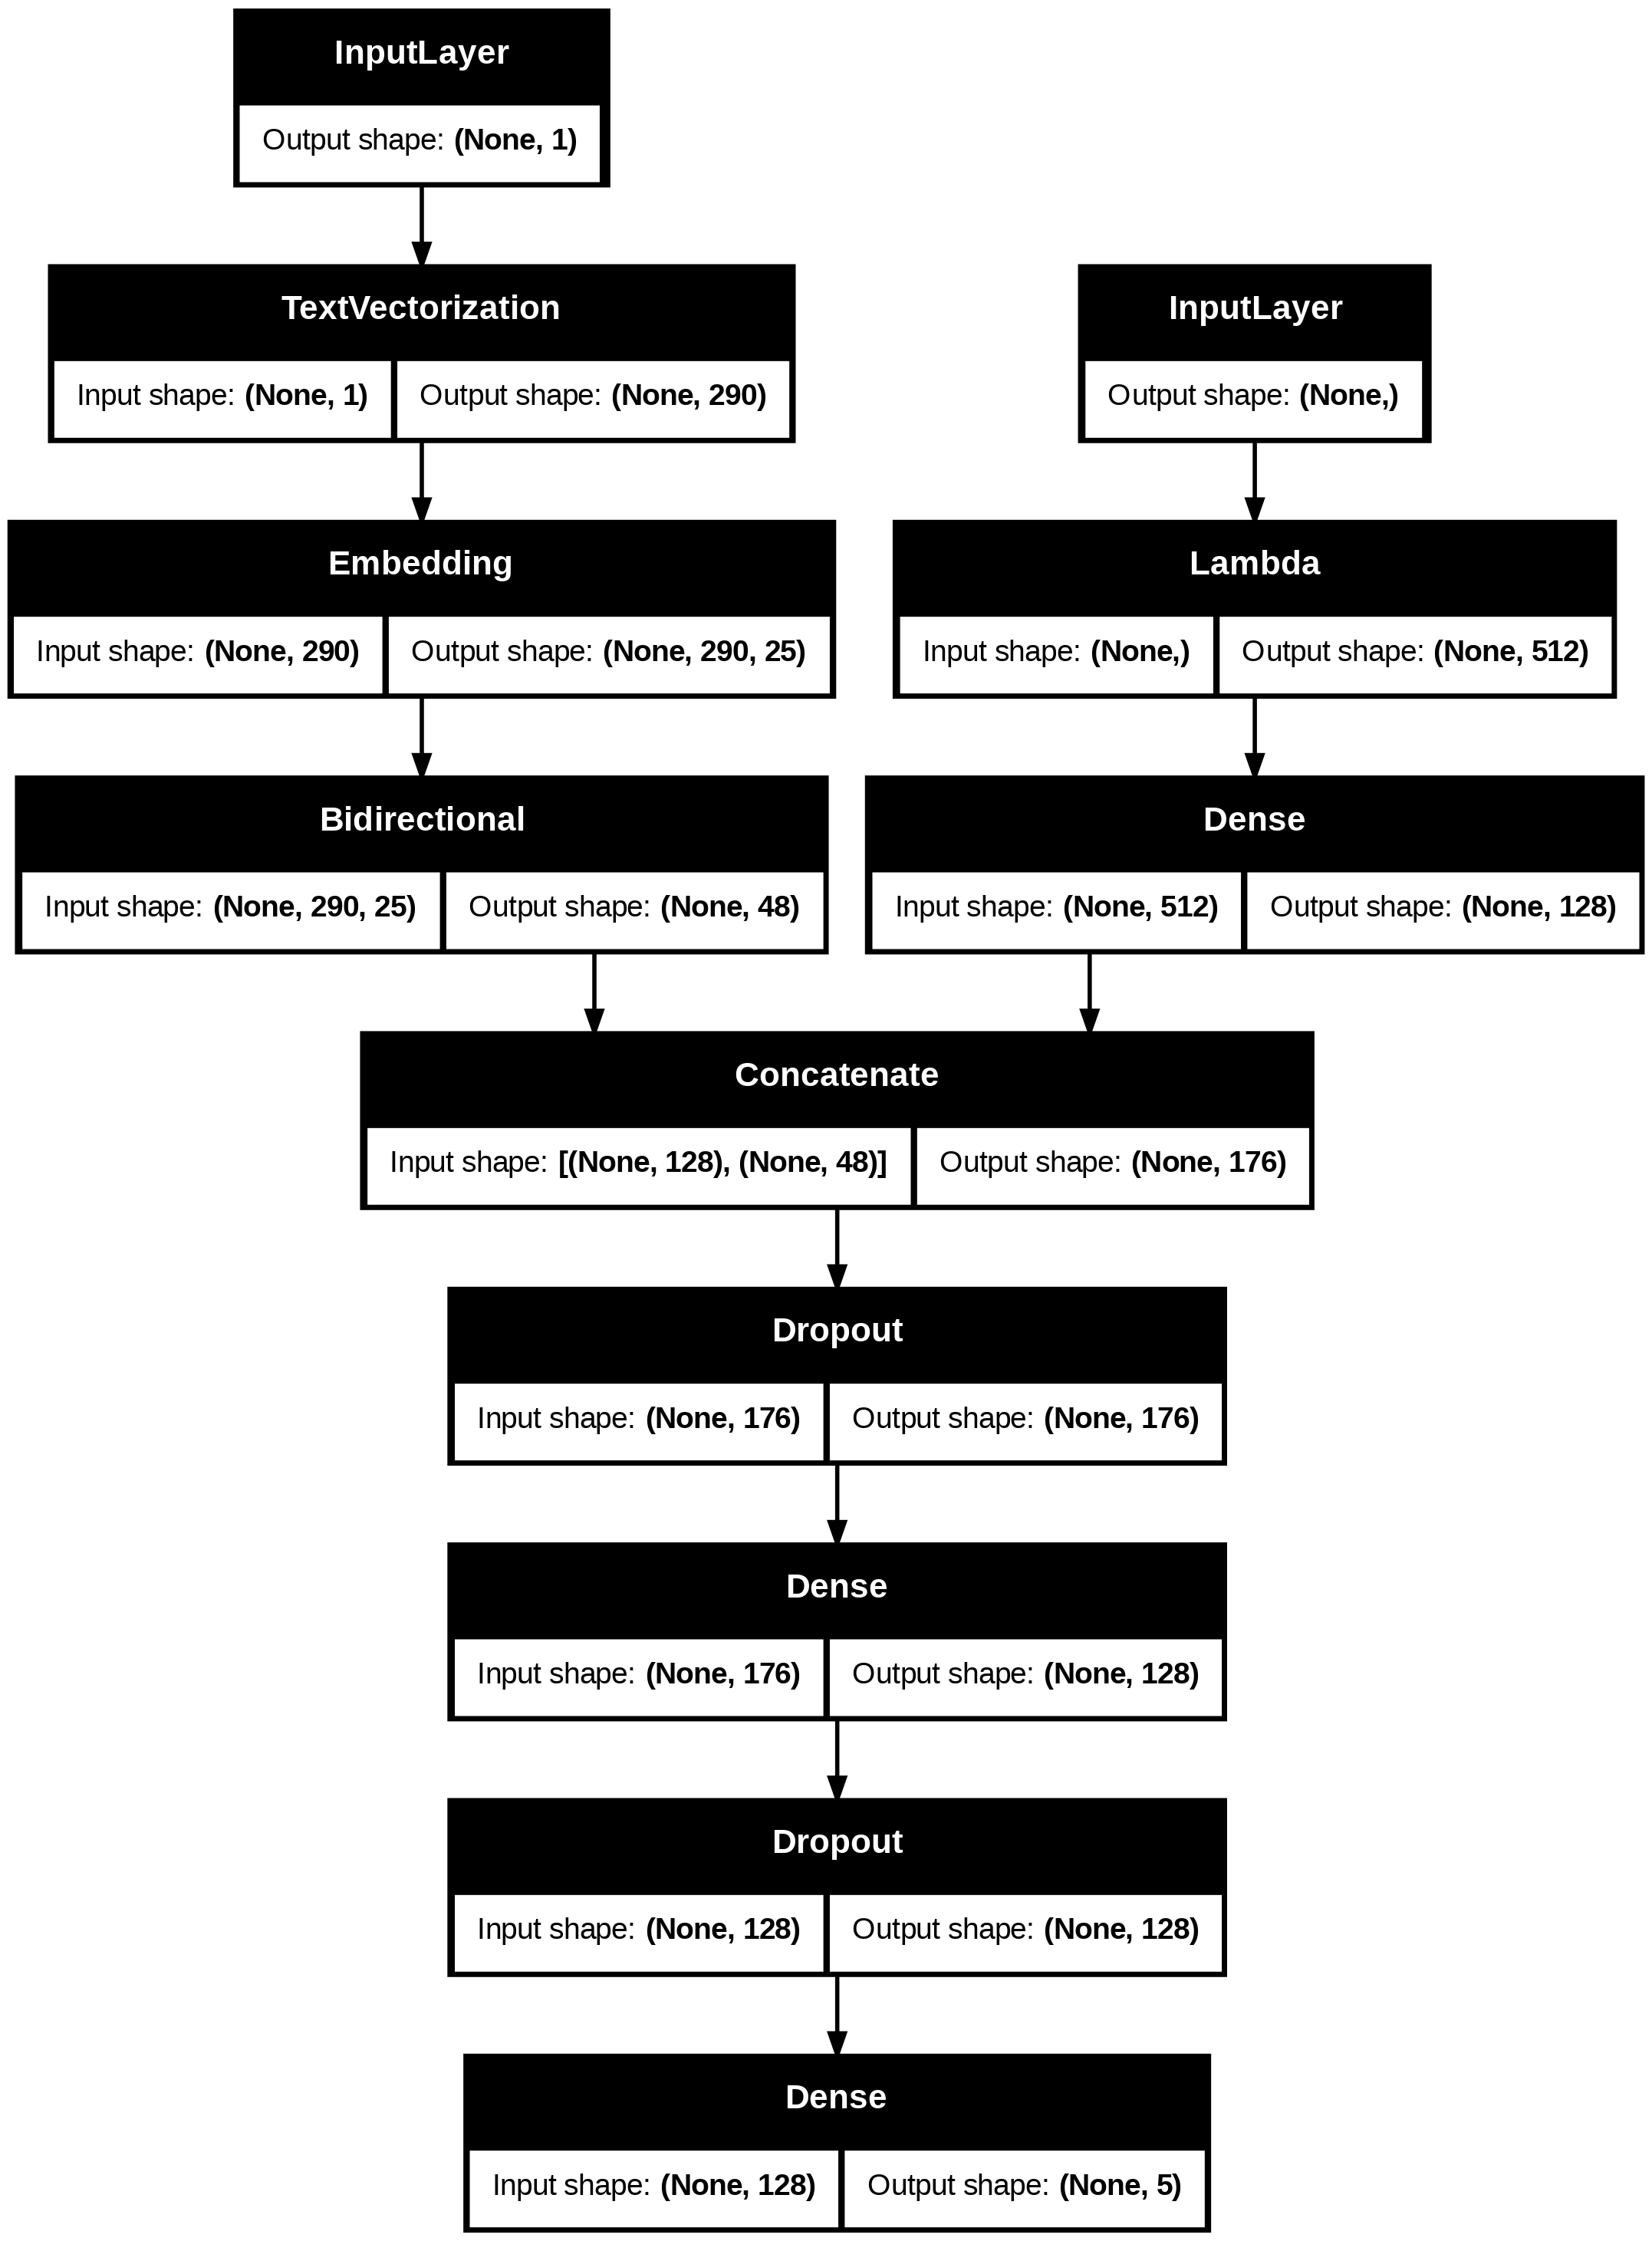

In [198]:
from keras.utils import plot_model
plot_model(model_5, show_shapes=True)

In [199]:
train_sentences = train_dataframe["text"].tolist()
val_sentences = val_dataframe["text"].tolist()
test_sentences = test_dataframe["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [200]:
## merging the char and token datasets

train_merged_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_merged_labels = tf.data.Dataset.from_tensor_slices(train_one_hot)

train_merged_dataset = tf.data.Dataset.zip((train_merged_data, train_merged_labels))
train_merged_dataset = train_merged_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_merged_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [201]:
val_merged_data = tf.data.Dataset.from_tensor_slices(((val_sentences, val_chars)))
val_merged_labels = tf.data.Dataset.from_tensor_slices(val_one_hot)

val_merged_dataset = tf.data.Dataset.zip((val_merged_data, val_merged_labels))
val_merged_dataset = val_merged_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_merged_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [202]:
model_5.fit(train_merged_dataset,
            steps_per_epoch=int(0.25*len(train_merged_dataset)),
            epochs=3,
            validation_data=val_merged_dataset,
            validation_steps=int(0.25*len(val_merged_dataset)))

Epoch 1/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 330s 229ms/step - accuracy: 0.5950 - loss: 1.0112 - val_accuracy: 0.7244 - val_loss: 0.7168
Epoch 2/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 325s 231ms/step - accuracy: 0.7145 - loss: 0.7610 - val_accuracy: 0.7434 - val_loss: 0.6696
Epoch 3/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 319s 227ms/step - accuracy: 0.7204 - loss: 0.7384 - val_accuracy: 0.7619 - val_loss: 0.6253


In [203]:
model_5.evaluate(val_merged_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.7550 - loss: 0.6435


[0.6454328298568726, 0.7541705369949341]

In [204]:
model_5_pred_probs = model_5.predict(val_merged_dataset)
model_5_pred_probs = np.array(model_5_pred_probs)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds


945/945 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 1])>

In [205]:
model_5_acc = accuracy_score(val_labels, model_5_preds) * 100
model_5_precision, model_5_recall, model_5_f1, _ = precision_recall_fscore_support(val_labels, model_5_preds, average="weighted")

model_5_results = {
    "accuracy": model_5_acc,
    "precision": model_5_precision,
    "recall": model_5_recall,
    "f1": model_5_f1
}

model_5_results

{'accuracy': 75.41705282669137,
 'precision': 0.7547259406427582,
 'recall': 0.7541705282669138,
 'f1': 0.750582875755187}

In [206]:
### Model 6 with pretrained token embeddings + char embedding+ positional embeddings

train_dataframe.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


<Axes: ylabel='Frequency'>

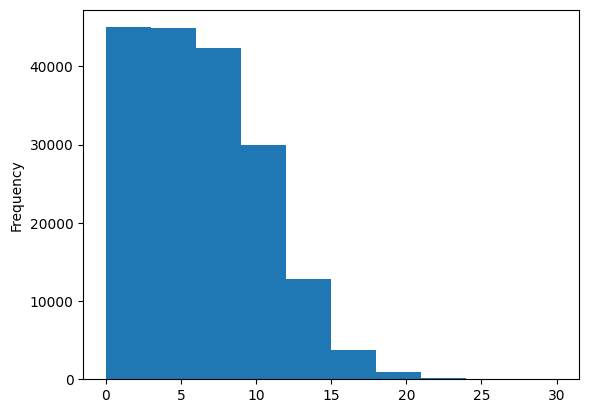

In [208]:
train_dataframe['line_number'].value_counts()

train_dataframe.line_number.plot.hist()

In [211]:
## creating one_hot_encoded line_number to get positional embedding

train_line_number = tf.one_hot(train_dataframe["line_number"].to_numpy(), depth=15)
val_line_number = tf.one_hot(val_dataframe["line_number"].to_numpy(), depth=15)
test_line_number = tf.one_hot(test_dataframe["line_number"].to_numpy(), depth=15)

train_line_number[:2]

<tf.Tensor: shape=(2, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

<Axes: ylabel='Frequency'>

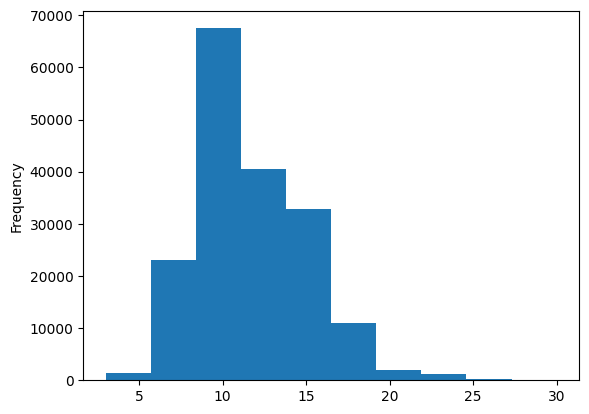

In [214]:
train_dataframe['total_lines'].value_counts()

train_dataframe.total_lines.plot.hist()


In [216]:
## creating one_hot_encoded total_lines to get positional embedding

train_total_lines = tf.one_hot(train_dataframe["total_lines"].to_numpy(), depth=20)
val_total_lines = tf.one_hot(val_dataframe["total_lines"].to_numpy(), depth=20)
test_total_lines = tf.one_hot(test_dataframe["total_lines"].to_numpy(), depth=20)

train_total_lines[:2]


<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [219]:
## create a token-level inputs as same Model-5


token_inputs = layers.Input(shape=[], dtype=tf.string)
#token_embed = tf_hub_embedding_layer(token_inputs)
token_embed = layers.Lambda(lambda x: tf_hub_embedding_layer(x), output_shape=(512,))(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embed)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_embedding_layer = layers.Embedding(input_dim=output_char_lenght,
                                    output_dim=25,
                                    )

## char inputs as Model 5

char_inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vector = char_vectorizer(char_inputs)
char_embedded = char_embedding_layer(char_vector)
char_bidierect = layers.Bidirectional(layers.LSTM(24))(char_embedded) ## get 24 from the paper
char_model = tf.keras.Model(char_inputs, char_bidierect)

## Line number

line_inputs = layers.Input(shape=(15,), dtype=tf.float32)
x = layers.Dense(32, activation="relu")(line_inputs)
line_model = tf.keras.Model(line_inputs, x)

## total lines

total_inputs = layers.Input(shape=(20,), dtype=tf.float32)
y = layers.Dense(32, activation="relu")(total_inputs)
total_model = tf.keras.Model(total_inputs, y)

## merge token and char

merged_token_char = layers.Concatenate()([token_model.output, char_model.output])
z = layers.Dense(256, activation="relu")(merged_token_char)
z = layers.Dropout(0.5)(z)

## merge line and total

all_merged = layers.Concatenate()([line_model.output, total_model.output, z])

output = layers.Dense(5, activation="softmax")(all_merged)

model_6 = tf.keras.Model([line_model.input, total_model.input, token_model.input,char_model.input], output)

model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [220]:
model_6.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_57            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_56            │ (None)                 │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_3      │ (None, 290)            │              0 │ input_layer_57[0][0]   │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_21 (Lambda)        │ (None, 512)            │              0 │ input_layer_56[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 290, 25)        │          7,250 │ text_vectorization_3[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 128)            │         65,664 │ lambda_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 48)             │          9,600 │ embedding_9[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 176)            │              0 │ dense_36[0][0],        │
│ (Concatenate)             │                        │                │ bidirectional_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_58            │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_59            │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 256)            │         45,312 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 32)             │            512 │ input_layer_58[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 32)             │            672 │ input_layer_59[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 256)            │              0 │ dense_39[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 320)            │              0 │ dense_37[0][0],        │
│ (Concatenate)             │                        │                │ dense_38[0][0],        │
│                           │                        │                │ dropout_6[0][0]        │
├──────────────────────

 Total params: 130,615 (510.21 KB)

 Trainable params: 130,615 (510.21 KB)

 Non-trainable params: 0 (0.00 B)

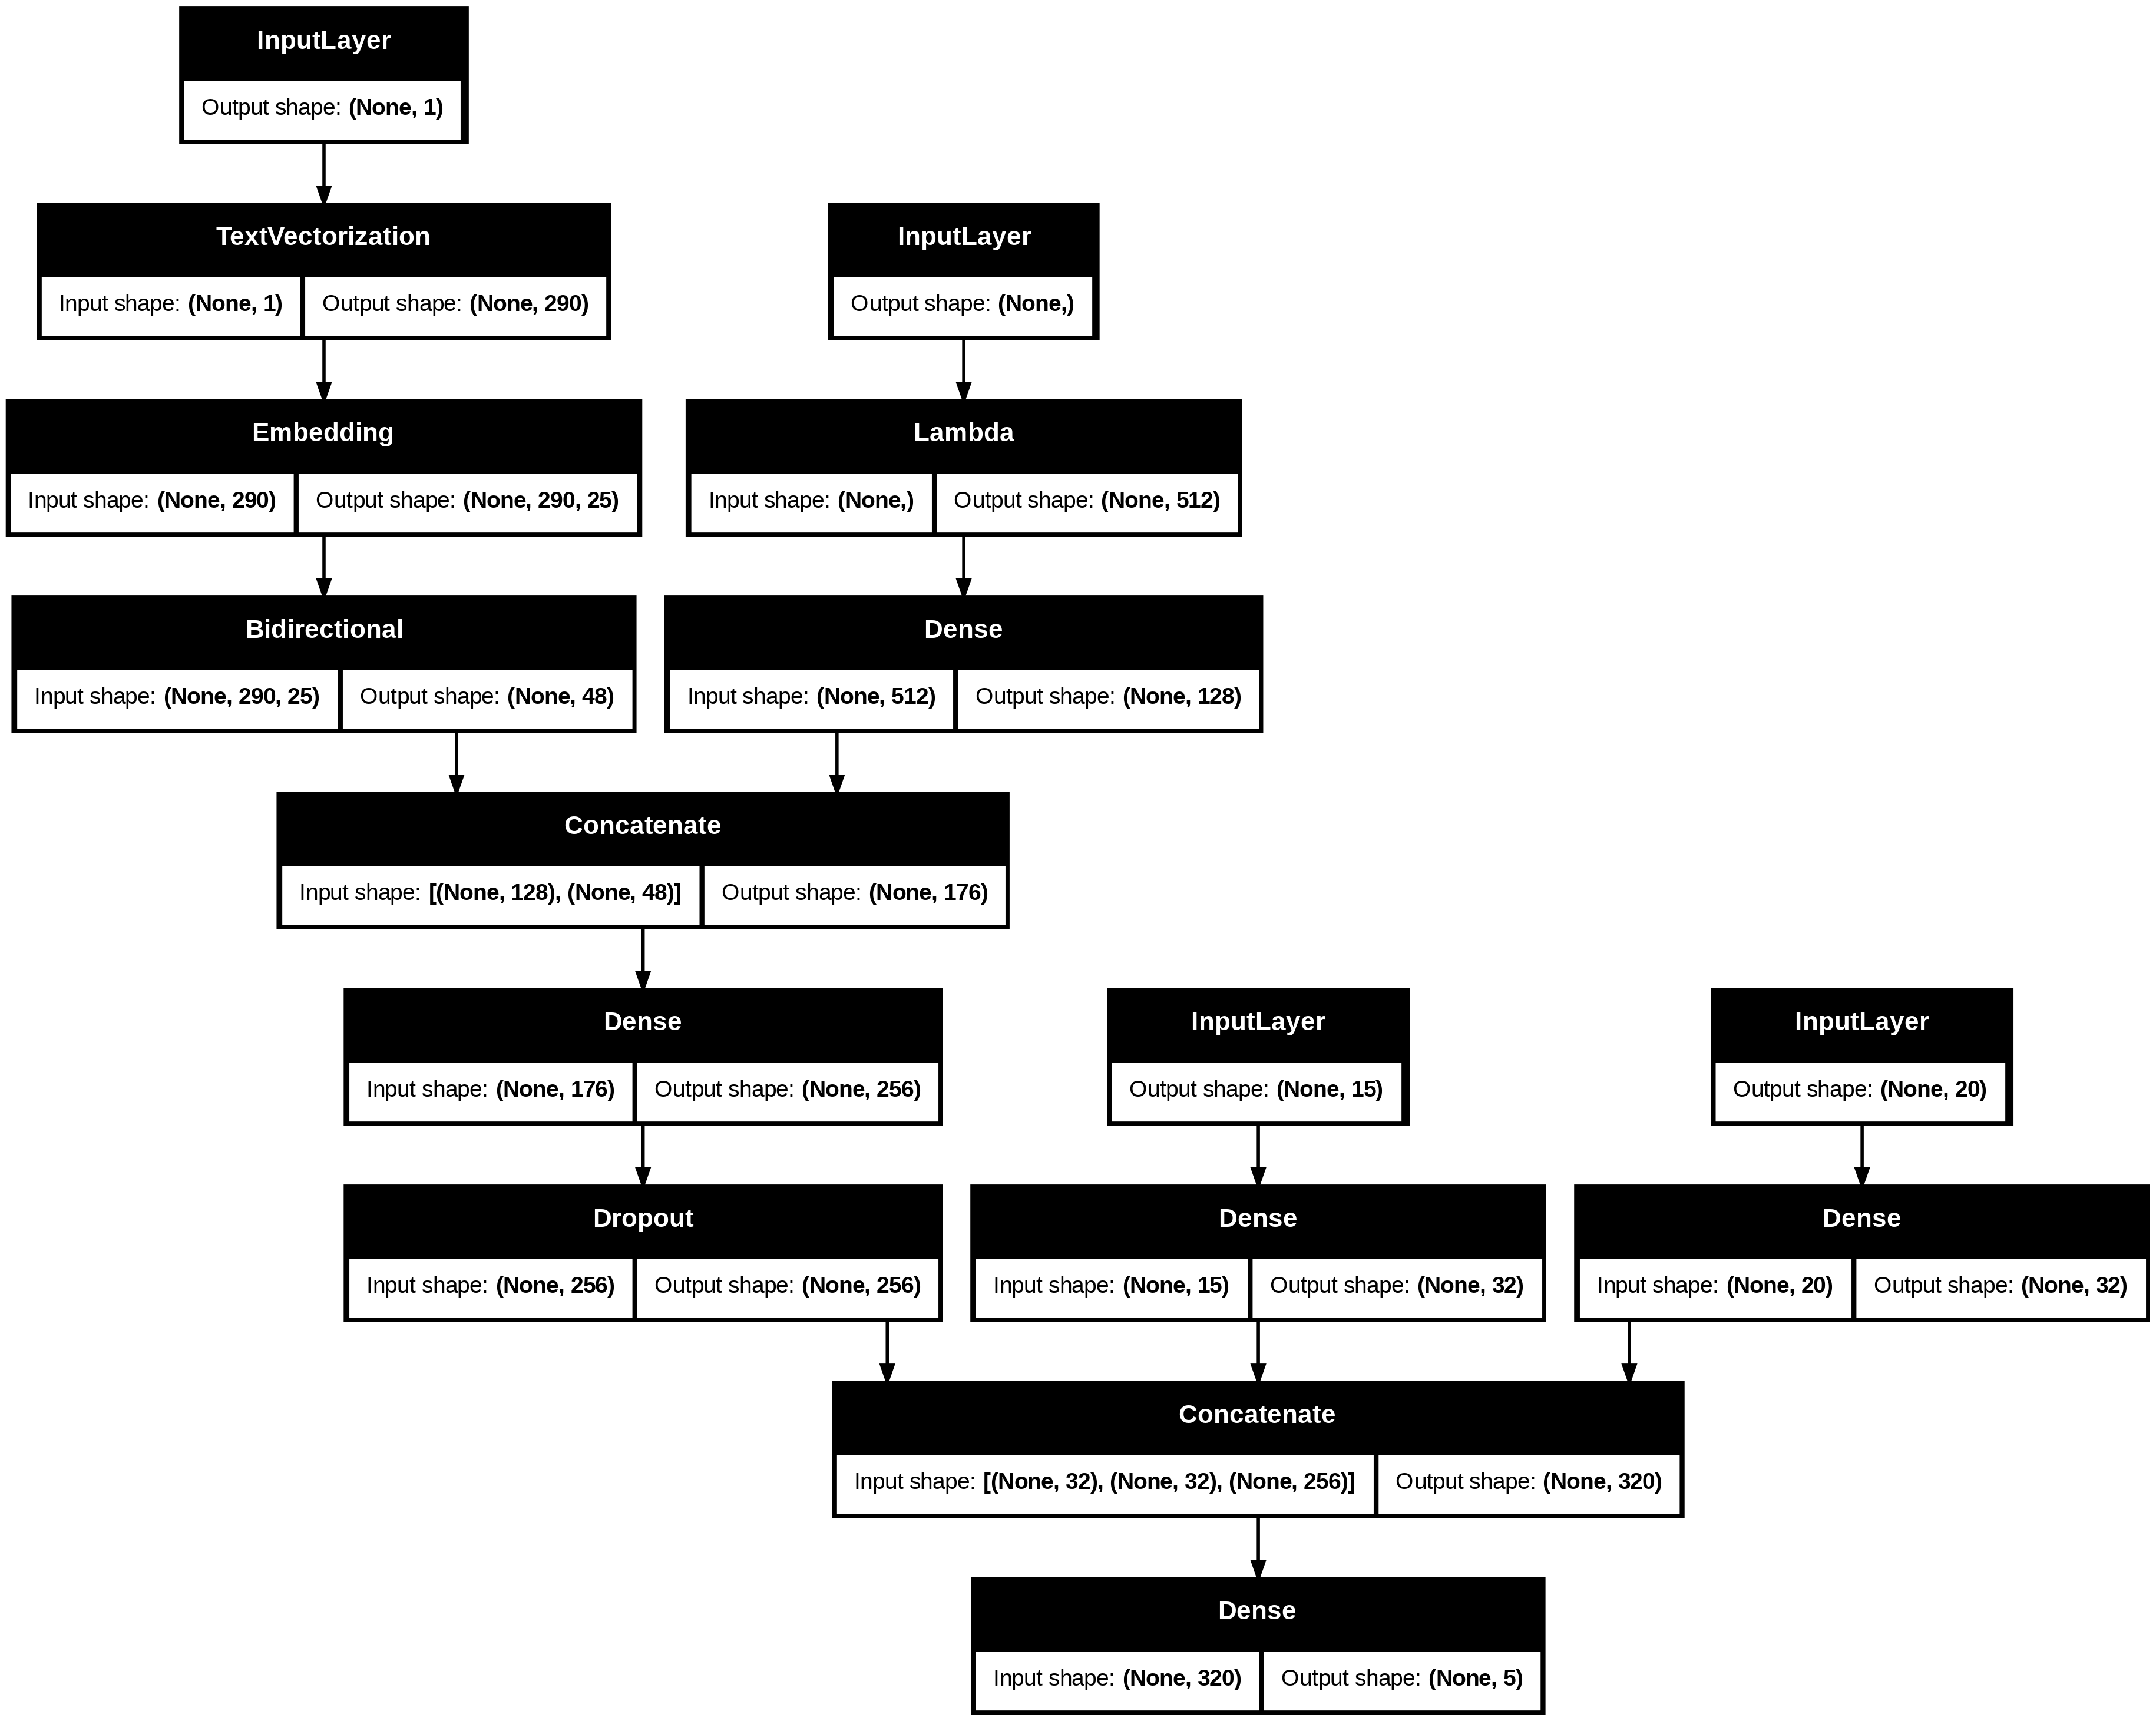

In [221]:
plot_model(model_6, show_shapes=True)

In [223]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [224]:
## Datesets

train_all_data = tf.data.Dataset.from_tensor_slices((train_line_number, train_total_lines, train_sentences, train_chars))
train_all_labels = tf.data.Dataset.from_tensor_slices(train_one_hot)

train_all_dataset = tf.data.Dataset.zip((train_all_data, train_all_labels))
train_all_dataset = train_all_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_all_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [225]:
vall_all_data = tf.data.Dataset.from_tensor_slices((val_line_number, val_total_lines, val_sentences, val_chars))
vall_all_labels = tf.data.Dataset.from_tensor_slices(val_one_hot)

vall_all_dataset = tf.data.Dataset.zip((vall_all_data, vall_all_labels))
vall_all_dataset = vall_all_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

vall_all_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [227]:
model_6.fit(train_all_dataset,
            steps_per_epoch=int(0.25*len(train_all_dataset)),
            epochs=3,
            validation_data=vall_all_dataset,
            validation_steps=int(0.25*len(vall_all_dataset)))

Epoch 1/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 330s 230ms/step - accuracy: 0.6906 - loss: 0.8037 - val_accuracy: 0.8232 - val_loss: 0.4575
Epoch 2/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 322s 229ms/step - accuracy: 0.8240 - loss: 0.4524 - val_accuracy: 0.8420 - val_loss: 0.4007
Epoch 3/3
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 319s 227ms/step - accuracy: 0.8359 - loss: 0.4318 - val_accuracy: 0.8598 - val_loss: 0.3911


In [228]:
model_6_pred_probs = model_6.predict(vall_all_dataset)
model_6_pred_probs = np.array(model_6_pred_probs)
model_6_preds = tf.argmax(model_6_pred_probs, axis=1)
model_6_preds

945/945 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 1, 1])>

In [229]:
model_6_acc = accuracy_score(val_labels, model_6_preds) * 100
model_6_precision, model_6_recall, model_6_f1, _ = precision_recall_fscore_support(val_labels, model_6_preds, average="weighted")

model_6_results = {
    "accuracy": model_6_acc,
    "precision": model_6_precision,
    "recall": model_6_recall,
    "f1": model_6_f1
}

model_6_results

{'accuracy': 85.07877664504171,
 'precision': 0.8552594110353898,
 'recall': 0.8507877664504171,
 'f1': 0.8476843282553377}

In [230]:
## making prediction with a sample article and the model_6

!wget https://github.com/fahriyegrl/article_reader_withNLP_tensor_flow/raw/main/article_example.json



--2024-08-14 05:30:37--  https://github.com/fahriyegrl/article_reader_withNLP_tensor_flow/raw/main/article_example.json
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/article_reader_withNLP_tensor_flow/main/article_example.json [following]
--2024-08-14 05:30:37--  https://raw.githubusercontent.com/fahriyegrl/article_reader_withNLP_tensor_flow/main/article_example.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘article_example.json’

article_example.jso 100%[===================>]   6.58K  --.-KB/s    in 0s      

2024-08-14 05:30:38 (49.1 MB/s

In [231]:
import json

with open("article_example.json", "r") as f:
  article_example = json.load(f)

article_example

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [232]:
pd.DataFrame(article_example)

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [235]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

nlp = spacy.load("en_core_web_sm")  # Load the English language model

sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe("sentencizer")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [236]:
doc = nlp(article_example[0]['abstract'])

In [239]:
lines = [str(sent) for sent in list(doc.sents)]
total_lines = len(lines)
total_lines

8

In [251]:
sample_lines = []
for i, line in enumerate(lines):
  sample_dict = {}
  sample_dict['text'] = str(line)
  sample_dict['line_number'] = i
  sample_dict['total_lines'] = len(total_lines) - 1
  sample_lines.append(sample_dict)



In [242]:
line_numbers = [line['line_number'] for line in sample_lines]
total_lines = [line['total_lines'] for line in sample_lines]
line_numbers_one_hot = tf.one_hot(line_numbers, depth=15)
total_lines_one_hot = tf.one_hot(total_lines, depth=20)

In [243]:
line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [245]:
chars = [split_characters(line['text']) for line in sample_lines]
chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [257]:
line_numbers_one_hot, total_lines_one_hot

(<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 <tf.Tensor: shape=(8, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0

In [259]:
lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [260]:
tf.constant(lines)

<tf.Tensor: shape=(8,), dtype=string, numpy=
array([b'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
       b'Participants were randomly assigned to treatment or wait-list conditions.',
       b'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
       b'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
       b'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
       b'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
       b'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
       b'Standardized effect size estimates were primarily in the medium and large ranges and fav

In [261]:
tf.constant(chars)

<tf.Tensor: shape=(8,), dtype=string, numpy=
array([b'T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
       b'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
       b'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
       b'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
       b'S i g n i f i c a n t   t r e a t m e n 

In [264]:
example_pred_prob = model_6.predict([line_numbers_one_hot, total_lines_one_hot,tf.constant(lines), tf.constant(chars)])
example_pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


array([[4.0660518e-01, 5.6708907e-03, 2.0033776e-04, 5.8735663e-01,
        1.6709715e-04],
       [1.3784170e-03, 1.7370037e-05, 9.9336177e-01, 7.6088583e-04,
        4.4816891e-03],
       [3.3315916e-02, 4.2594702e-04, 9.0997481e-01, 4.9487062e-02,
        6.7961002e-03],
       [4.6241045e-02, 4.2706013e-02, 7.2793025e-01, 1.6304957e-02,
        1.6681771e-01],
       [9.8711820e-03, 3.4387942e-02, 3.3479130e-01, 2.5943795e-03,
        6.1835521e-01],
       [1.9624578e-03, 5.1213787e-03, 9.0548235e-01, 9.9604623e-04,
        8.6437702e-02],
       [5.6812039e-04, 1.9016132e-01, 2.8695028e-02, 4.2416570e-05,
        7.8053308e-01],
       [1.7542501e-04, 1.0226812e-01, 1.6697748e-01, 4.4462555e-05,
        7.3053449e-01]], dtype=float32)

In [265]:
example_pred = tf.argmax(example_pred_prob, axis=1)
example_pred

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [270]:
label_encoder.classes_

class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [277]:
for i, line in enumerate(lines[:len(class_names)]):
  print(f'{class_names[i]}: {line}')

BACKGROUND: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
CONCLUSIONS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
OBJECTIVE: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
